# SimiC Pipeline - Visualization Tutorial

>*Author: Irene Marín-Goñi, PhD student - ML4BM group (CIMA University of Navarra)*

This notebook provides a comprehensive guide to explore `SimiCPipeline` results and generate visualizations with publication-quality.

## Overview

This tutorial covers:
1. Creating a visualization object from your results
2. Customizing labels for better readability
3. Weight distribution visualizations
4. AUC score distributions and comparisons
5. Dissimilarity heatmaps
6. UMAP integration with TF activity scores
7. Network-specific visualizations

For preprocessing steps, see `Tutorial_SimiCPipeline_preprocessing.ipynb`.

For pipeline execution, see `Tutorial_SimiCPipeline_full.ipynb`

## Setup

The easiest way to configure your environment is to follow the `README` instructions using `poetry` (or `Docker`).

Required packages for this tutorial:
- simicpipeline
- pandas
- numpy
- os
- pickle
- anndata (for UMAP visualizations)
- scanpy (for UMAP visualizations)

In [1]:
import os
print(os.getcwd())
print(os.listdir())
import simicpipeline 
print(f"SimiC pipeline version: ", {simicpipeline.__version__})
from simicpipeline import SimiCVisualization

/home/workdir
['SimiCExampleRun', 'data']
SimiC pipeline version:  {'0.1.0'}


## Step 1: Initialize Visualization Object

Create a visualization instance loading data from your completed pipeline run.
- `project_dir`: Working directory path where input files are located and output files will be saved
- `run_name`: Unique identifier for this analysis run (used as prefix for output files)
- `search`: Bool for whether to automatically search for simic output files in project directory. Default: `True`.
- `lambda1`: Lambda1 regularization parameter (optional)
- `lambda2`: Lambda2 regularization parameter (optional)
- `label_names`: Dictionary mapping labels to custom names (optional)
- `adata`: AnnData object containing cell metadata (optional)

In [2]:
# Initialize visualization object
viz = SimiCVisualization(
    project_dir="./SimiCExampleRun/KPB25L/Tumor",
    run_name="experiment_tumor",
    lambda1=0.1,
    lambda2=0.01,
    p2assignment="./SimiCExampleRun/KPB25L/Tumor/inputFiles/treatment_annotation.txt",
    label_names={0: 'Control', 1: 'PD-L1',2: 'DAC',3: 'Combination'},
    colors={0: '#e0e0e0', 1: '#a8c8ff', 2: '#ffb6b6', 3: '#c1a9e0'}
)

print(f"✓ Visualization object created")
print(f"  Project directory: {viz.project_dir}")
print(f"  Run name: {viz.run_name}")
print(f"  Figures will be saved to: {viz.figures_path}")
# List available results (check in case there were typing errors)
viz.available_results()
viz.print_project_info(max_depth=4)

Label names set: {0: 'Control', 1: 'PD-L1', 2: 'DAC', 3: 'Combination'}
Label colors set: {0: '#e0e0e0', 1: '#a8c8ff', 2: '#ffb6b6', 3: '#c1a9e0'}
✓ Visualization object created
  Project directory: SimiCExampleRun/KPB25L/Tumor
  Run name: experiment_tumor
  Figures will be saved to: SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor

Available Results:
✓ Ws_raw
✓ Ws_filtered
✗ auc_raw
✓ auc_filtered

Tumor/
├── inputFiles/
│   ├── TF_list.csv
│   ├── TF_list.pickle
│   ├── expression_matrix.pickle
│   └── treatment_annotation.txt
└── outputSimic/
    ├── figures/
    │   └── experiment_tumor/
    │       ├── ALL_TF_weights_barplot_grid.pdf
    │       ├── AUC_cumulative.pdf
    │       ├── AUC_distributions_detailed.pdf
    │       ├── AUC_distributions_filled.pdf
    │       ├── AUC_distributions_smooth.pdf
    │       ├── R2_distribution.pdf
    │       ├── Top_TF_weights_barplot.pdf
    │       ├── dissimilarity_heatmap.pdf
    │       ├── experiment_tumor_AUC_statis

Just that simple the viz object localized all the data and you can start plotting!

## Step 2: Weight Distribution Visualizations

### R² Distribution Plots

Visualize the quality of regression fits across phenotypes.


PLOTTING R² DISTRIBUTIONS



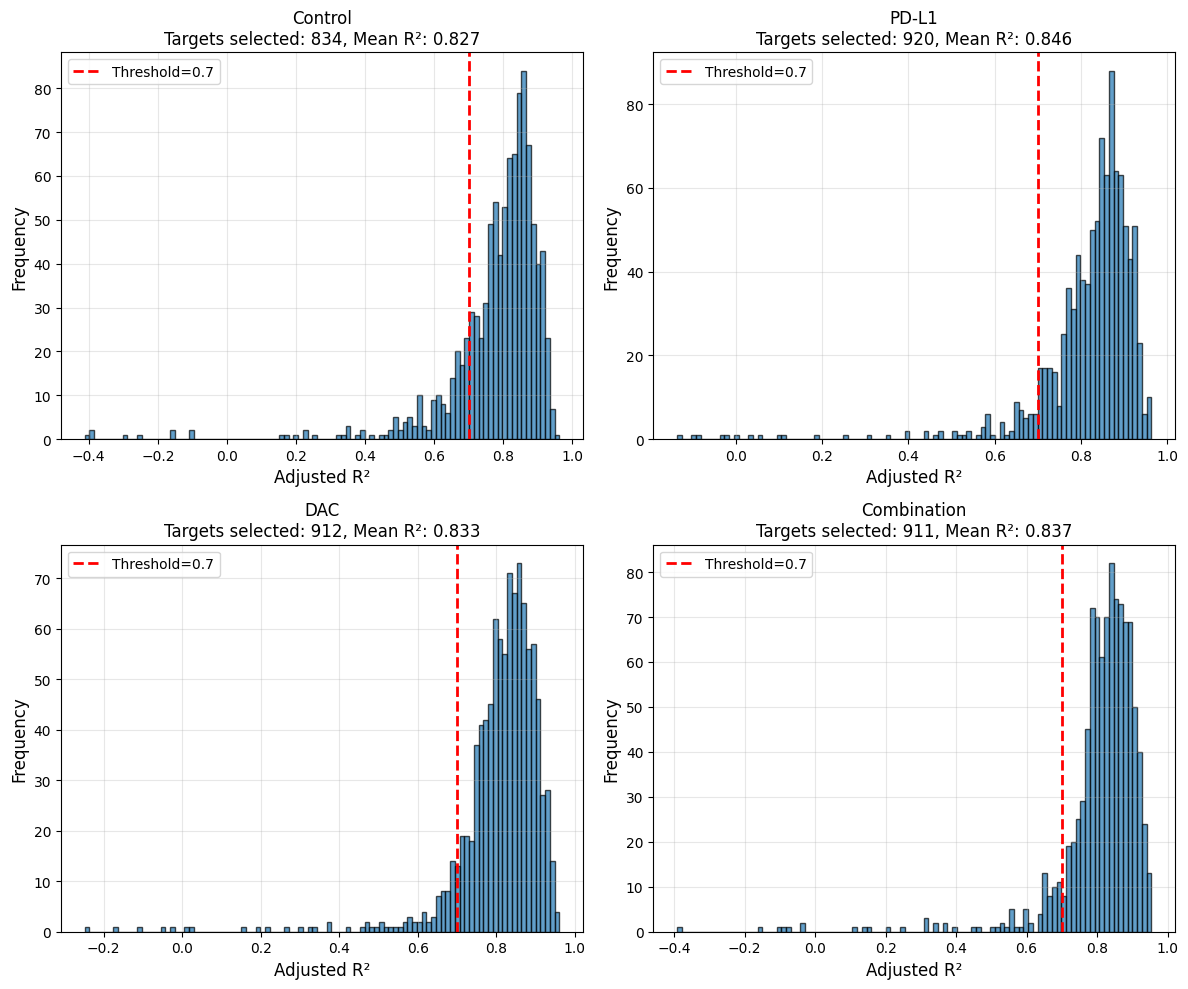

✓ R² distribution plots created


In [3]:
# Plot R² distributions
fig = viz.plot_r2_distribution(
    threshold=0.7,
    # labels =[0,2],
    save=True,
    grid_layout=(2,2),
    filename="R2_distribution.pdf"
)
print("✓ R² distribution plots created")

In [4]:
# Get top TFs by dissimilarity score for visualization
MinMax_all = viz.calculate_dissimilarity(verbose=False)
top_tfs = MinMax_all.head(10).index.tolist()

print(f"Top 5 TFs by dissimilarity:")
for tf in top_tfs:
    print(f"  - {tf}: {MinMax_all.loc[tf, 'MinMax_score']:.4f}")

Top 5 TFs by dissimilarity:
  - Twist2: 0.6755
  - Esr1: 0.6109
  - Zfp950: 0.6105
  - Tead1: 0.5836
  - Etv6: 0.5830
  - Tcf7l2: 0.5761
  - Trps1: 0.5739
  - Runx1: 0.5715
  - Nfat5: 0.5665
  - Rfx3: 0.5578


### TF Weight Barplots

Visualize regulatory weights for transcription factors across target genes.


PLOTTING TF WEIGHT BARPLOTS

Plotting 10 tfs...
Multi-page mode: 2x2 per page (3 pages)
  [1] Processing Twist2...
  [1] Processing Esr1...
  [1] Processing Zfp950...
  [1] Processing Tead1...
Showing first 2 pages preview...


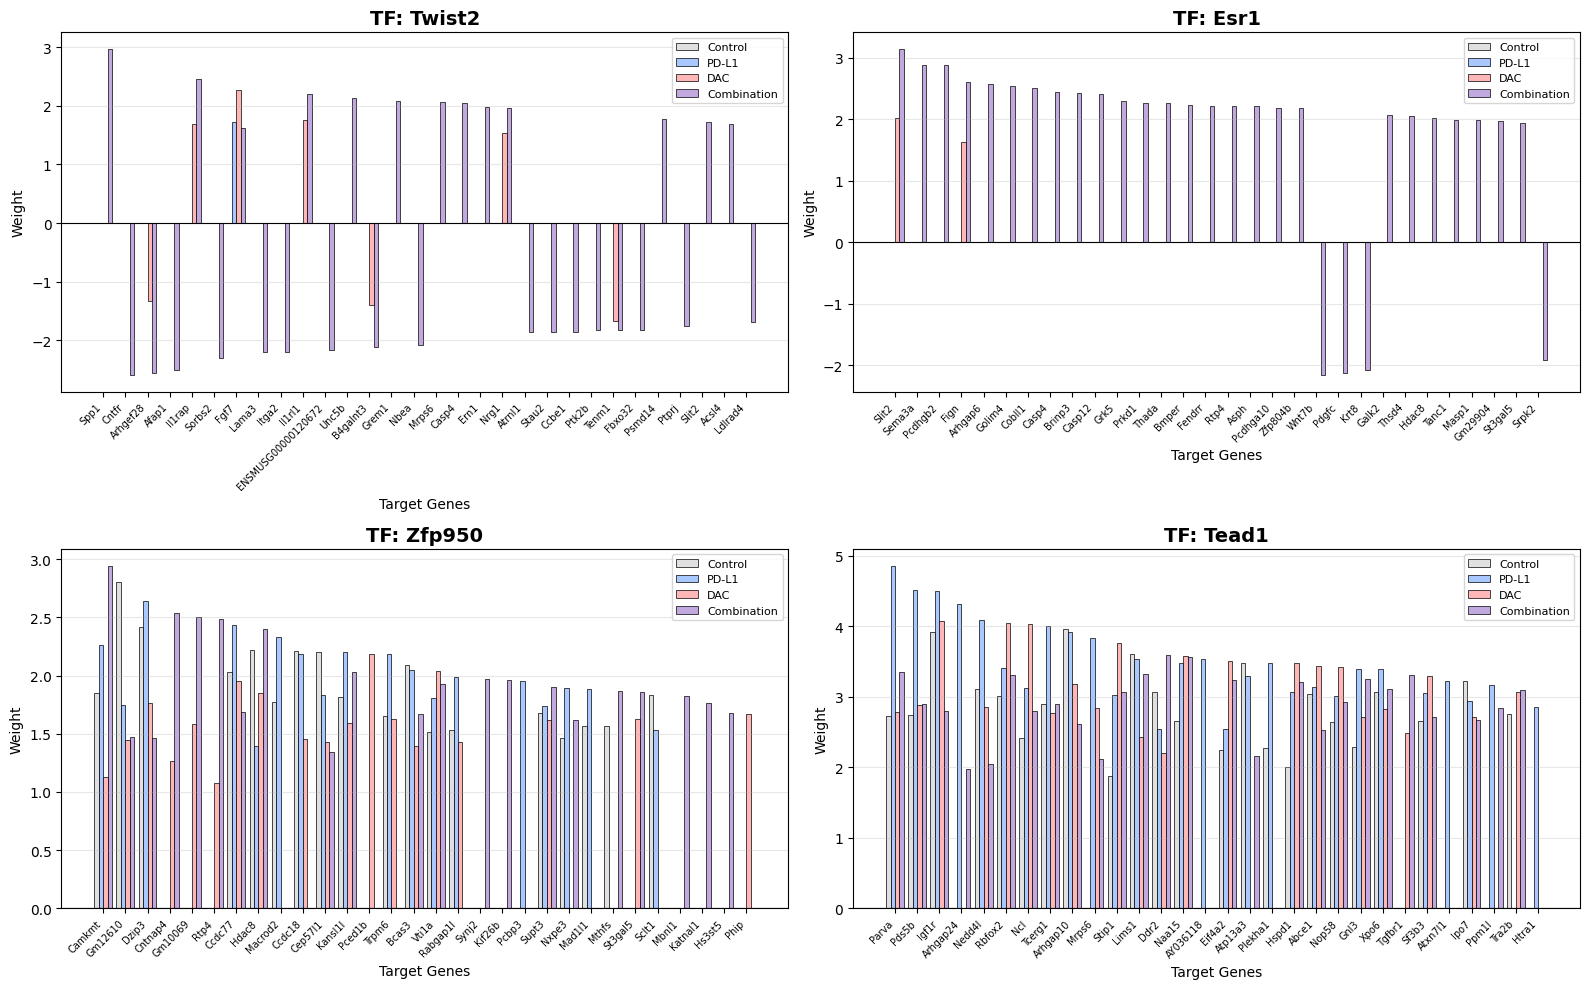

  [2] Processing Etv6...
  [2] Processing Tcf7l2...
  [2] Processing Trps1...
  [2] Processing Runx1...
Showing first 2 pages preview...


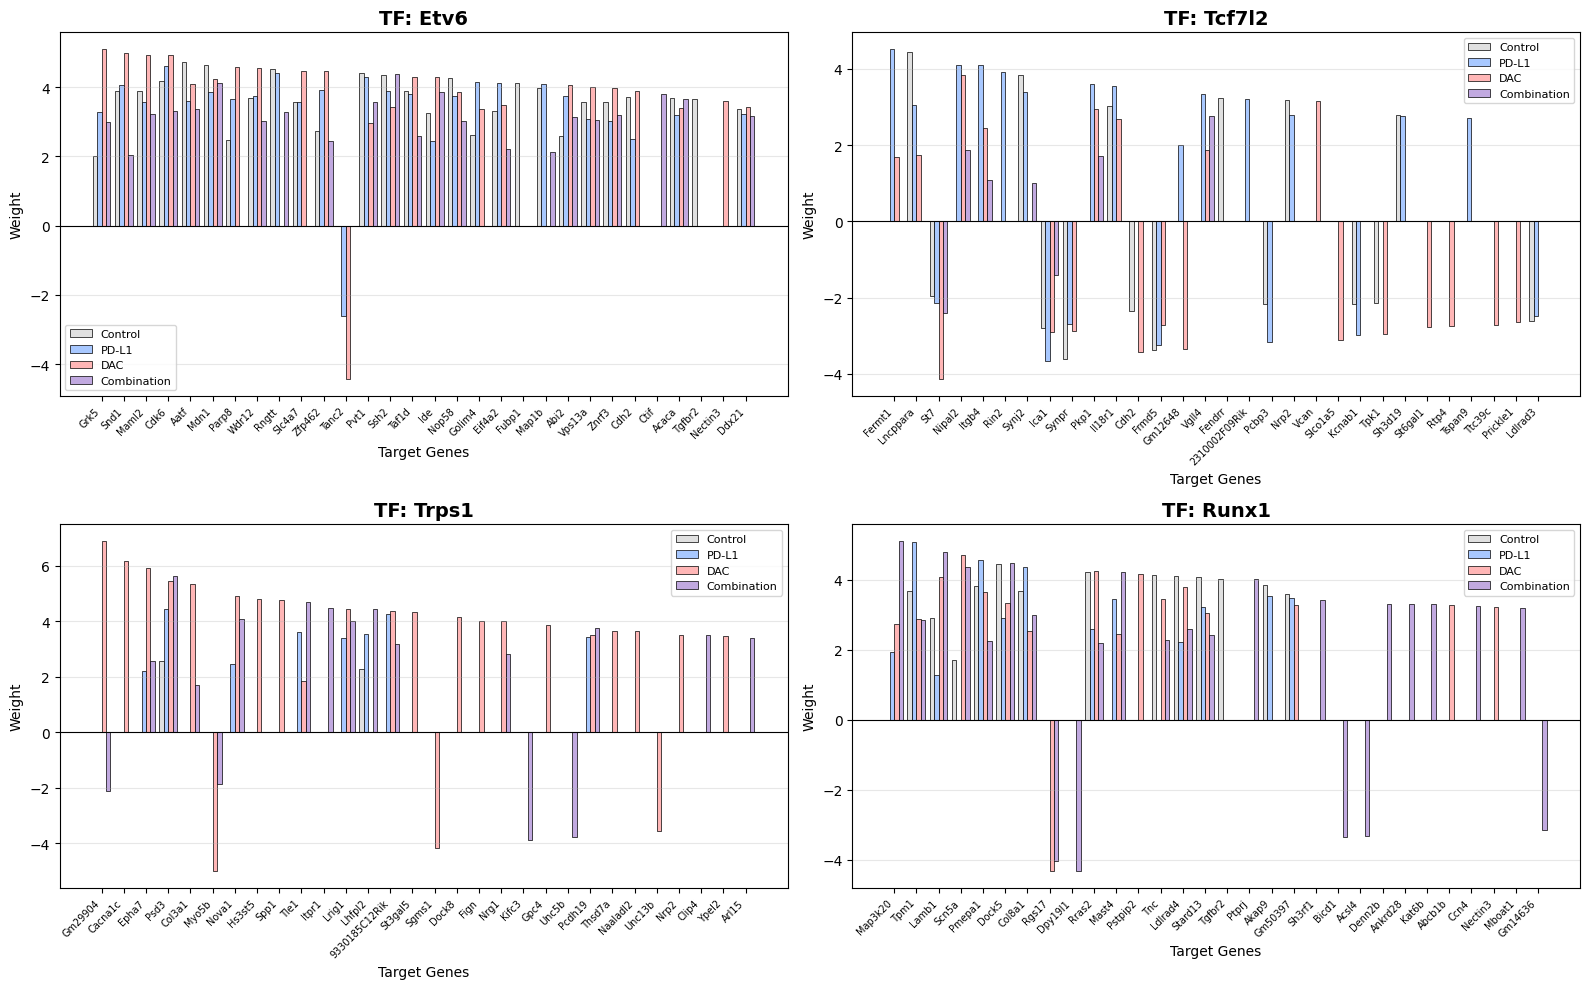

  [3] Processing Nfat5...
  [3] Processing Rfx3...

✓ Saved 10 tfs to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/Top_TF_weights_barplot.pdf


In [5]:
# Plot TF weights for top TFs
fig = viz.plot_tf_weights(
    tf_names=top_tfs,  # TFs to plot
    top_n_targets=30, # Number of top targets to display ordered by mean absolute weight
    r2_threshold = 0.7, # Only include targets with R² above this threshold
    grid_layout=(2,2),
    save = True,
    filename="Top_TF_weights_barplot.pdf"
)

If you wish to generate barplots for all TFs you can use:


PLOTTING TF WEIGHT BARPLOTS

Plotting 100 tfs...
Multi-page mode: 4x1 per page (25 pages)
Generating all tf plots...
Showing first 2 pages preview...


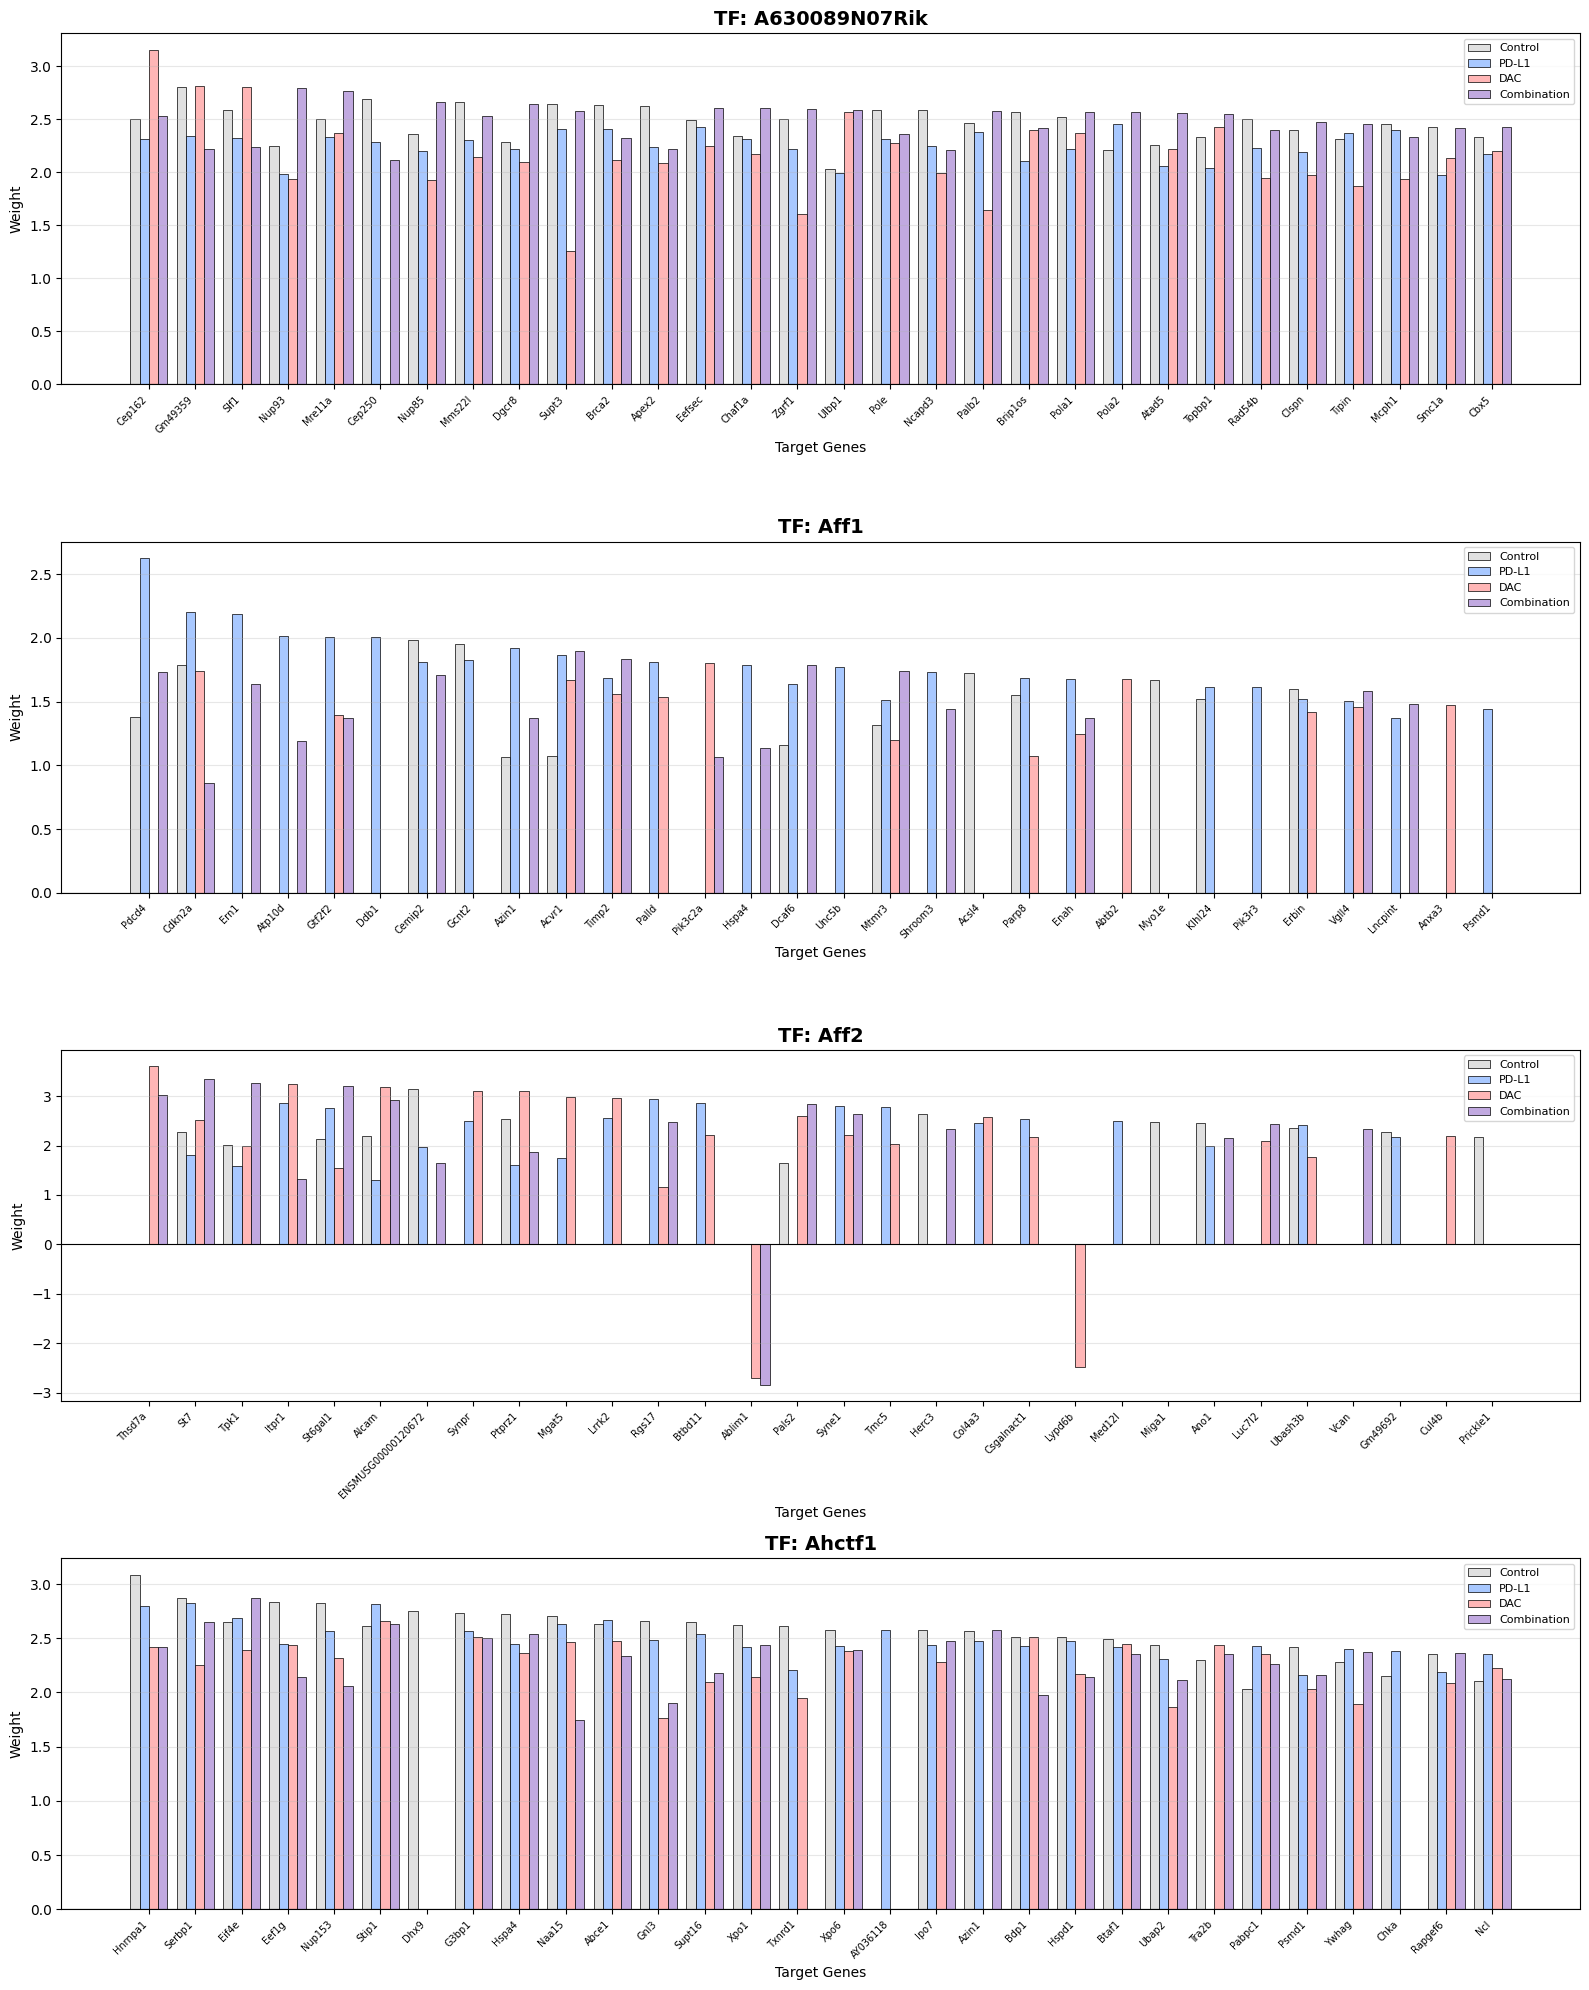

Showing first 2 pages preview...


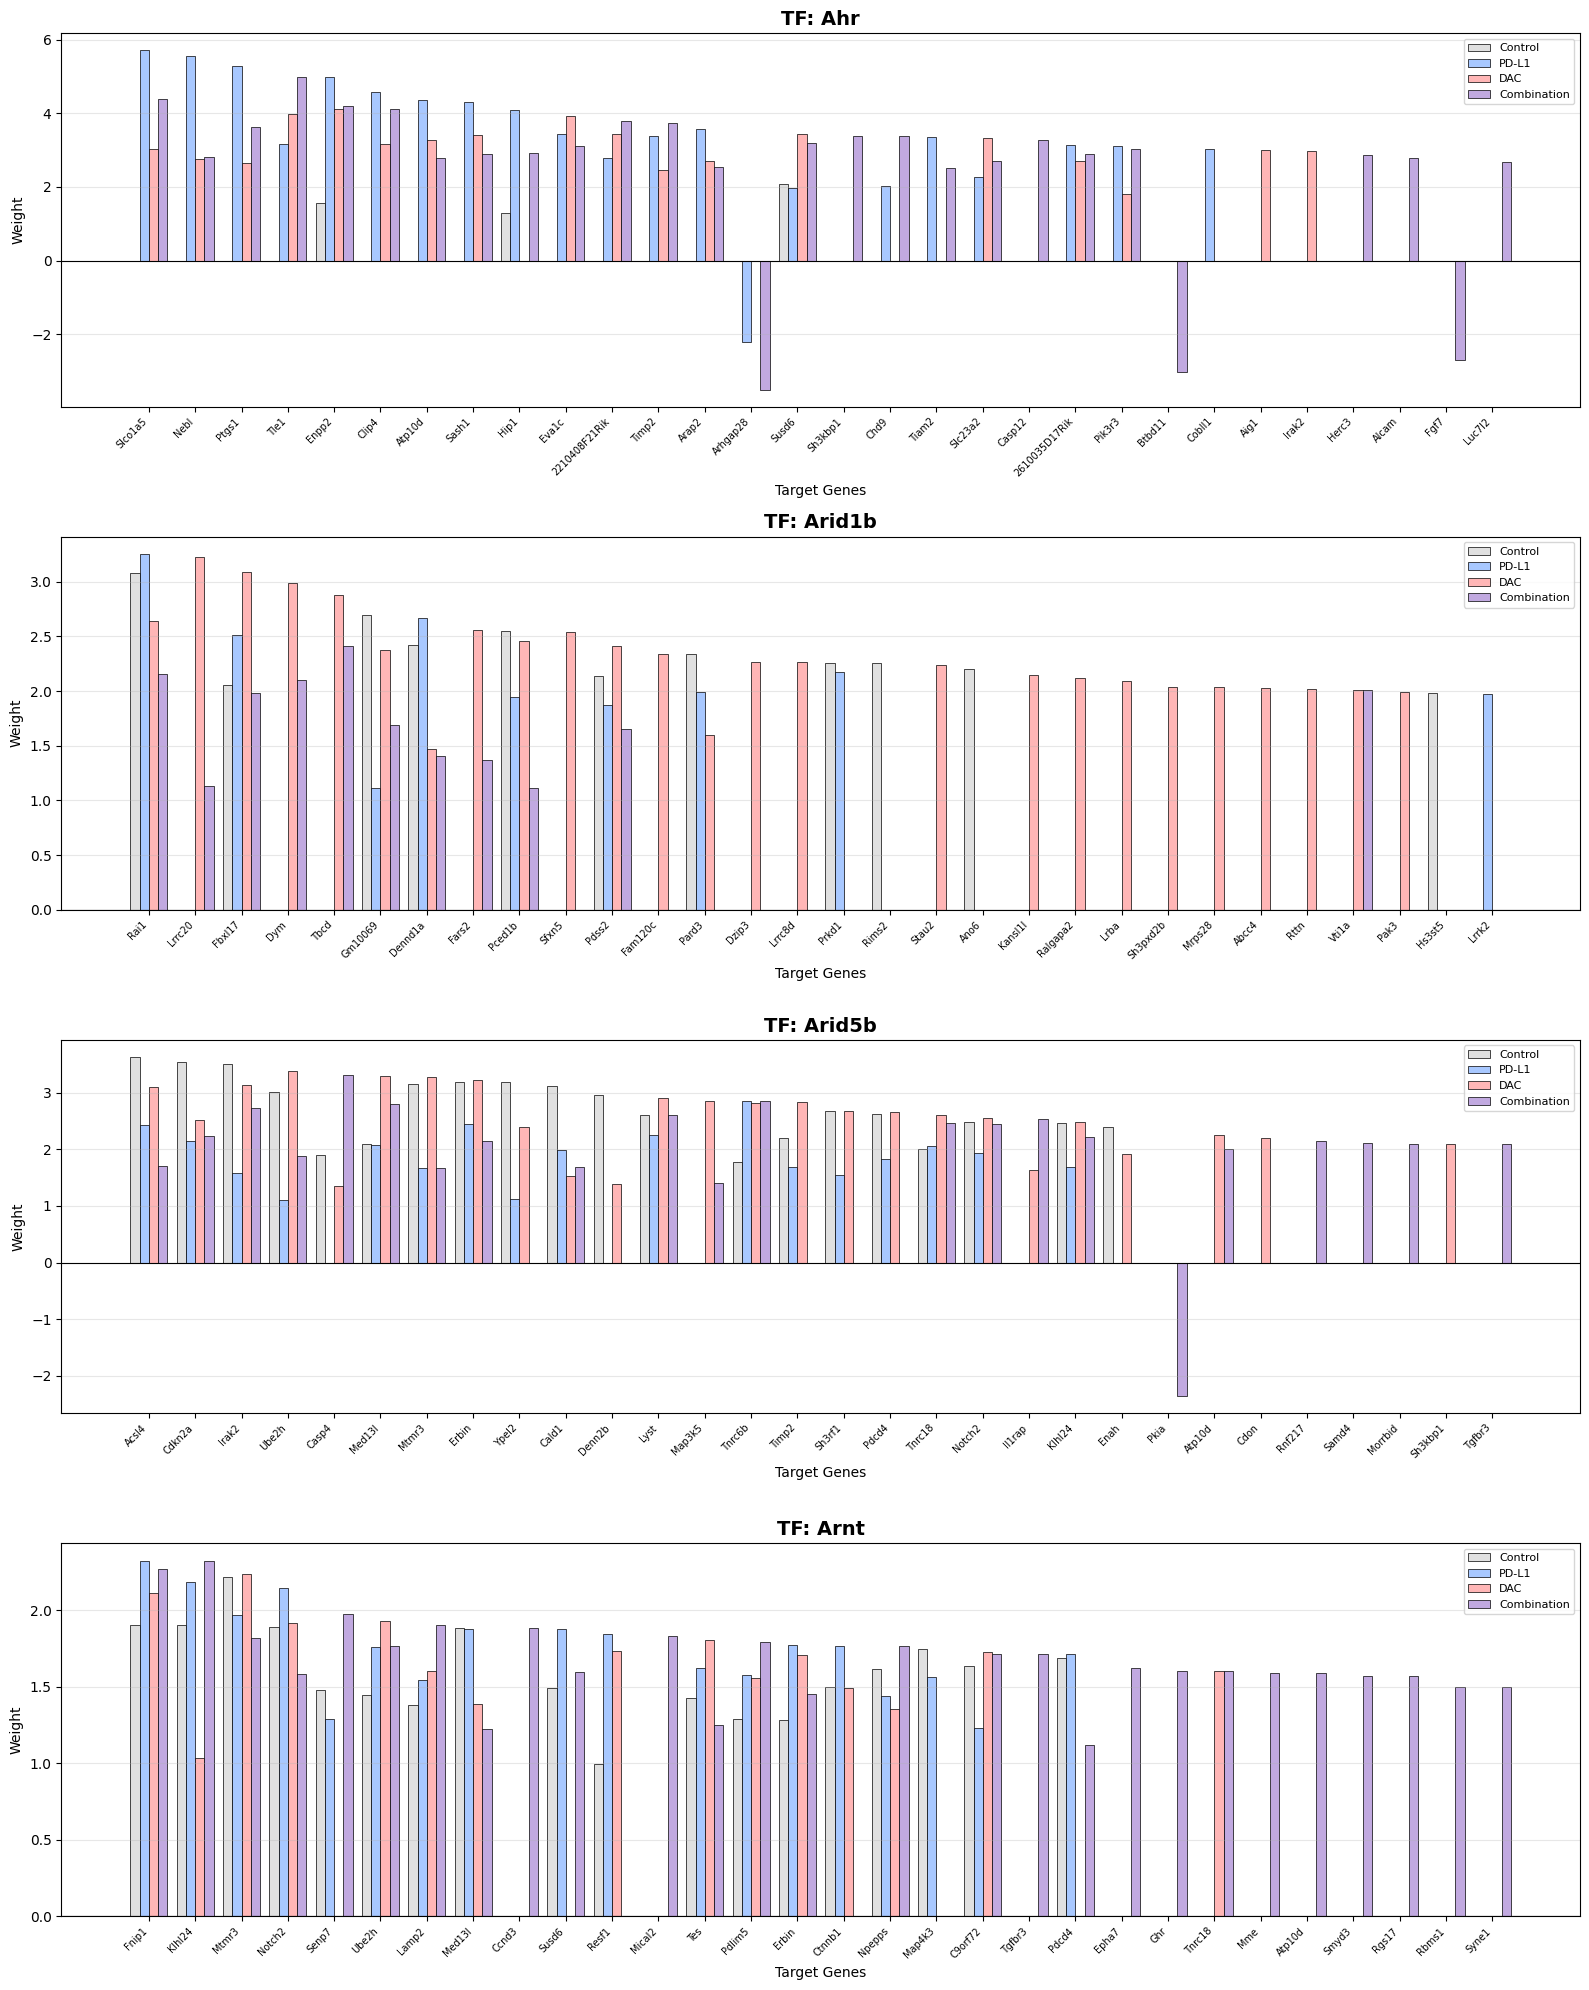


✓ Saved 100 tfs to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/ALL_TF_weights_barplot_grid.pdf


In [6]:
fig = viz.plot_tf_weights(
    tf_names = None, # Plot all TFs 
    top_n_targets=30,
    save=True,
    grid_layout = (4,1), # Define the grid layout (rows, columns) per pdf page
    r2_threshold = 0.7,
    filename="ALL_TF_weights_barplot_grid.pdf"
)

Note you can also select the labels to plot.


PLOTTING TF WEIGHT BARPLOTS

Plotting 1 tfs...
Single page mode: 1 rows x 1 col
  [1] Processing Tead1...


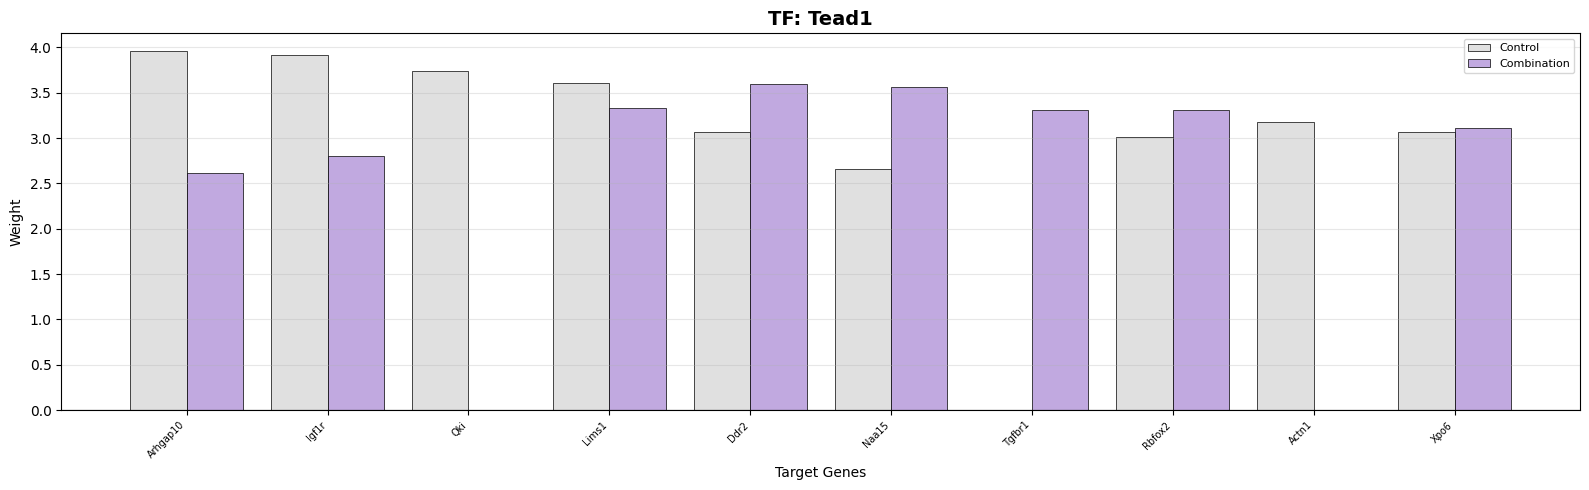

In [7]:
fig = viz.plot_tf_weights(
    tf_names="Tead1",  # TFs to plot
    labels = [0,3], # Specify which conditions to plot
    top_n_targets=10, # Number of top targets to display ordered by mean absolute weight
    grid_layout = None, # No grid layout, single plot
    r2_threshold = 0.7, # Only include targets with R² above this threshold
    save = False
)

### Target Gene Weight Barplots

Visualize which TFs regulate specific target genes. Similar to `plot_tf_weights` you can customize the grid, layout, the labels and threshold.


PLOTTING TARGET WEIGHT BARPLOTS

Plotting 7 targets...
Single page mode: 7 rows x 1 col
  [1] Processing Kmt2e...
  [1] Processing Pdgfra...
  [1] Processing Bcl2...
  [1] Processing Rad50...
  [1] Processing Rad51...
  [1] Processing Brca1...
  [1] Processing Brca2...

✓ Saved 7 targets to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/selected_target_weights_barplot.pdf


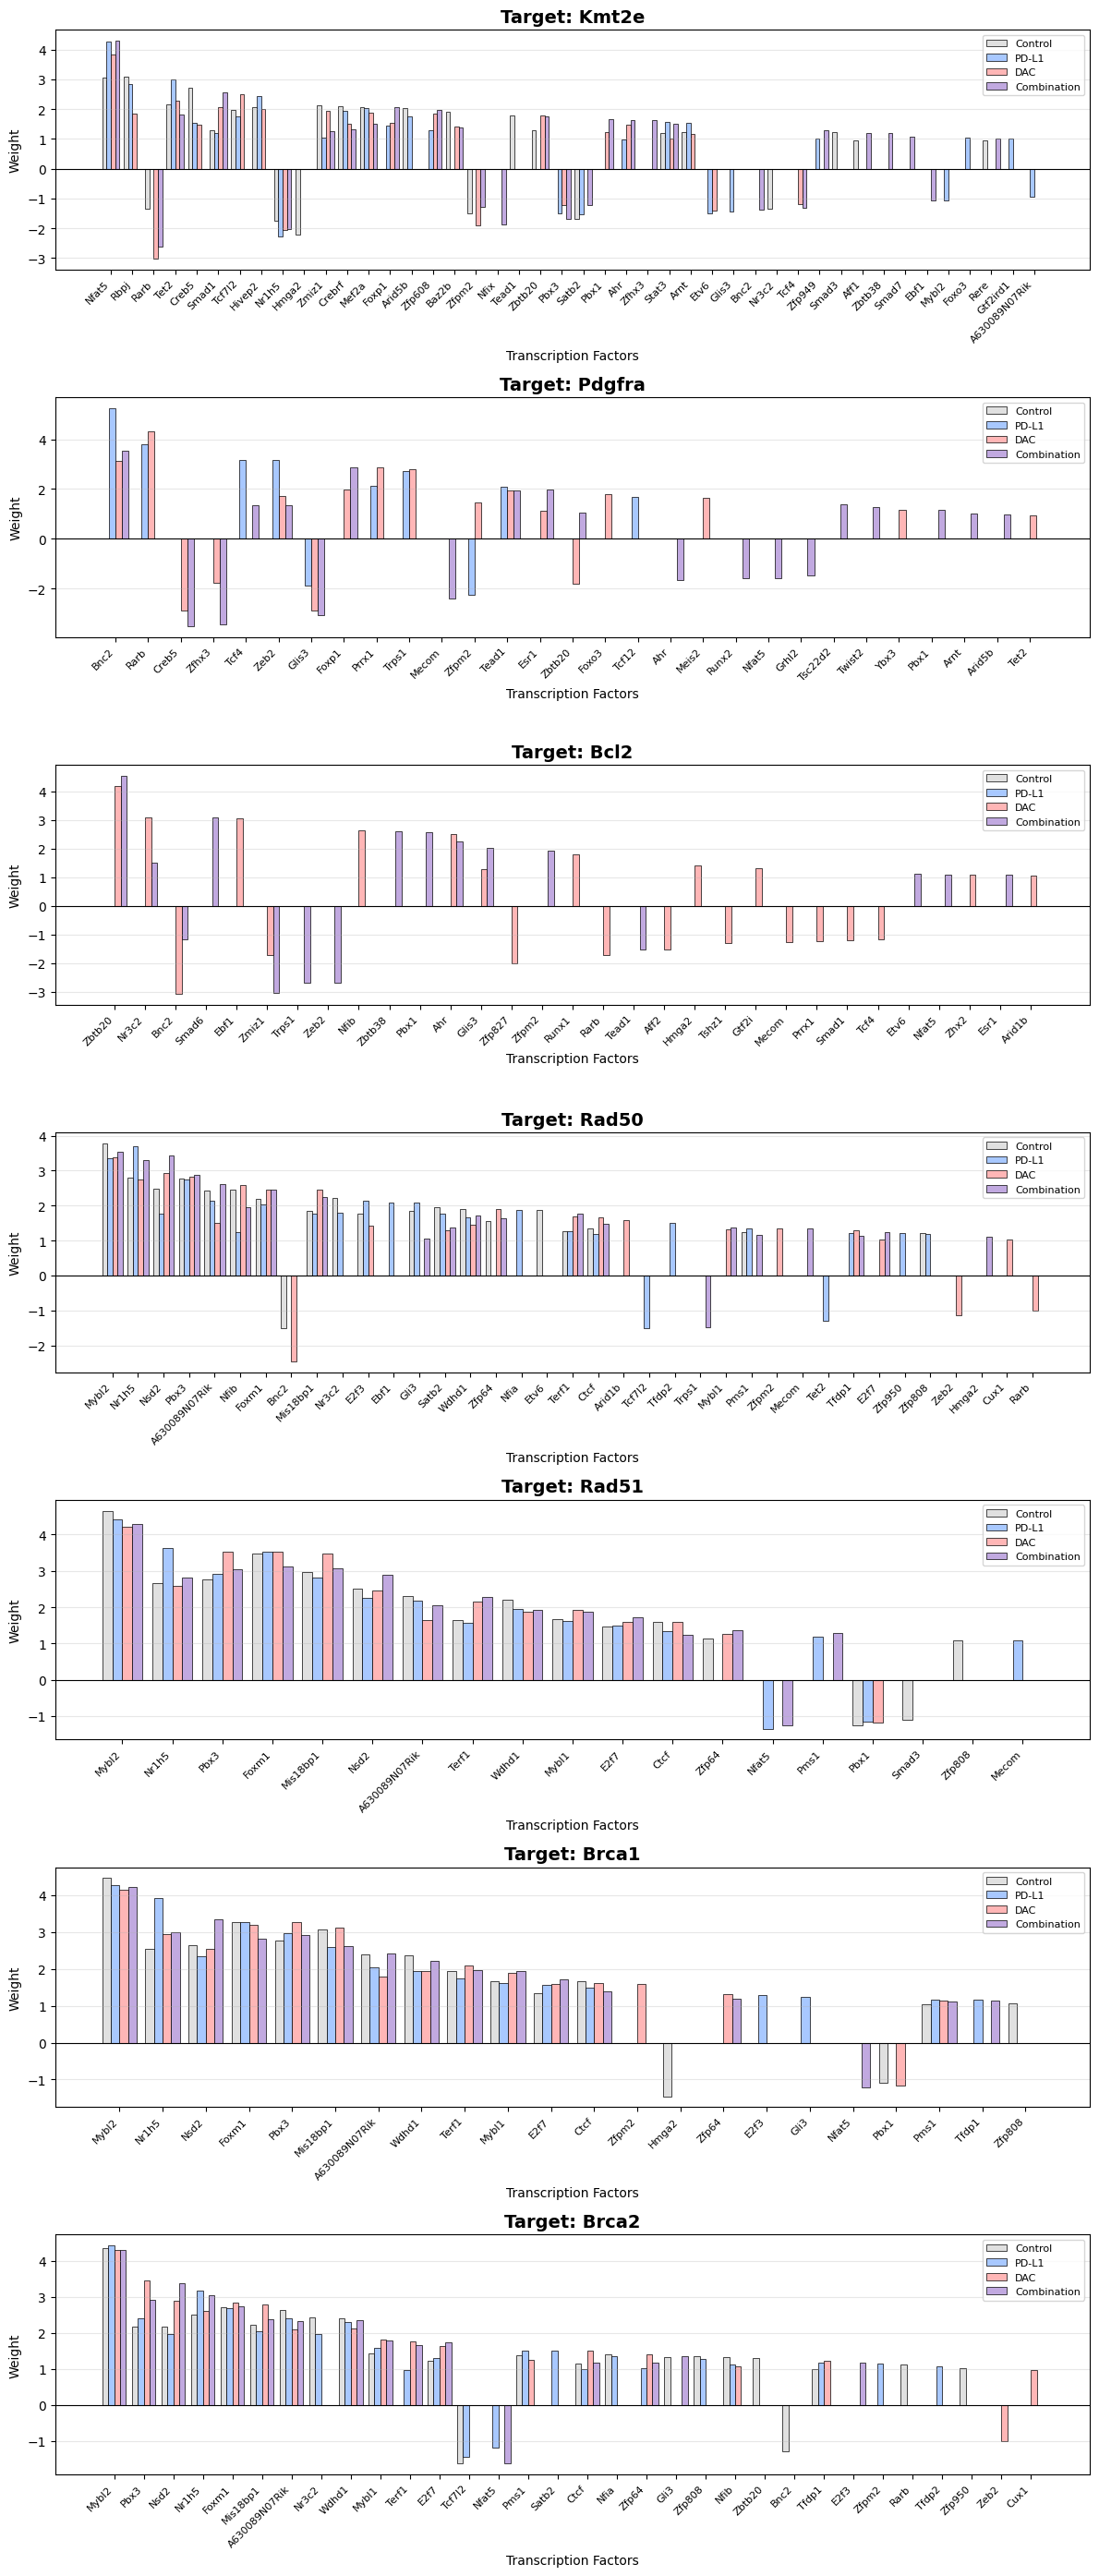

In [8]:
# Example target genes - replace with genes of interest
target_genes = ['Kmt2e', 'Pdgfra', "Mdm2", 'Bcl2','Rad50','Rad51','Brca1','Brca2']

# Plot target weights
fig = viz.plot_target_weights(
    target_names=target_genes,
    labels = [0,1,2,3],
    r2_threshold = 0.7,
    grid_layout = None,
    save=True,
    filename="selected_target_weights_barplot.pdf"
)

Again, you can plot all the targets using:

In [ ]:
fig = viz.plot_target_weights(
    target_names = None, # Plot all targets
    grid_layout = (4,1),
    save=True,
    r2_threshold = 0.9,
    filename="ALL_TARGET_weights_barplot_grid.pdf"
)

## Step 3: AUC Distribution Visualizations

### Basic AUC Distributions

Plot TF activity score distributions with filled density curves.


PLOTTING AUC DISTRIBUTIONS

Comparing labels [0, 1, 2, 3].
Plotting 4 TFs...
Single page mode: 2 rows x 2 cols (all 4 TFs on one page)
  [1/4] Processing Twist2...
  [2/4] Processing Esr1...
  [3/4] Processing Zfp950...
  [4/4] Processing Tead1...

✓ Saved 4 TFs to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/AUC_distributions_filled.pdf
Showing first 2 pages preview...


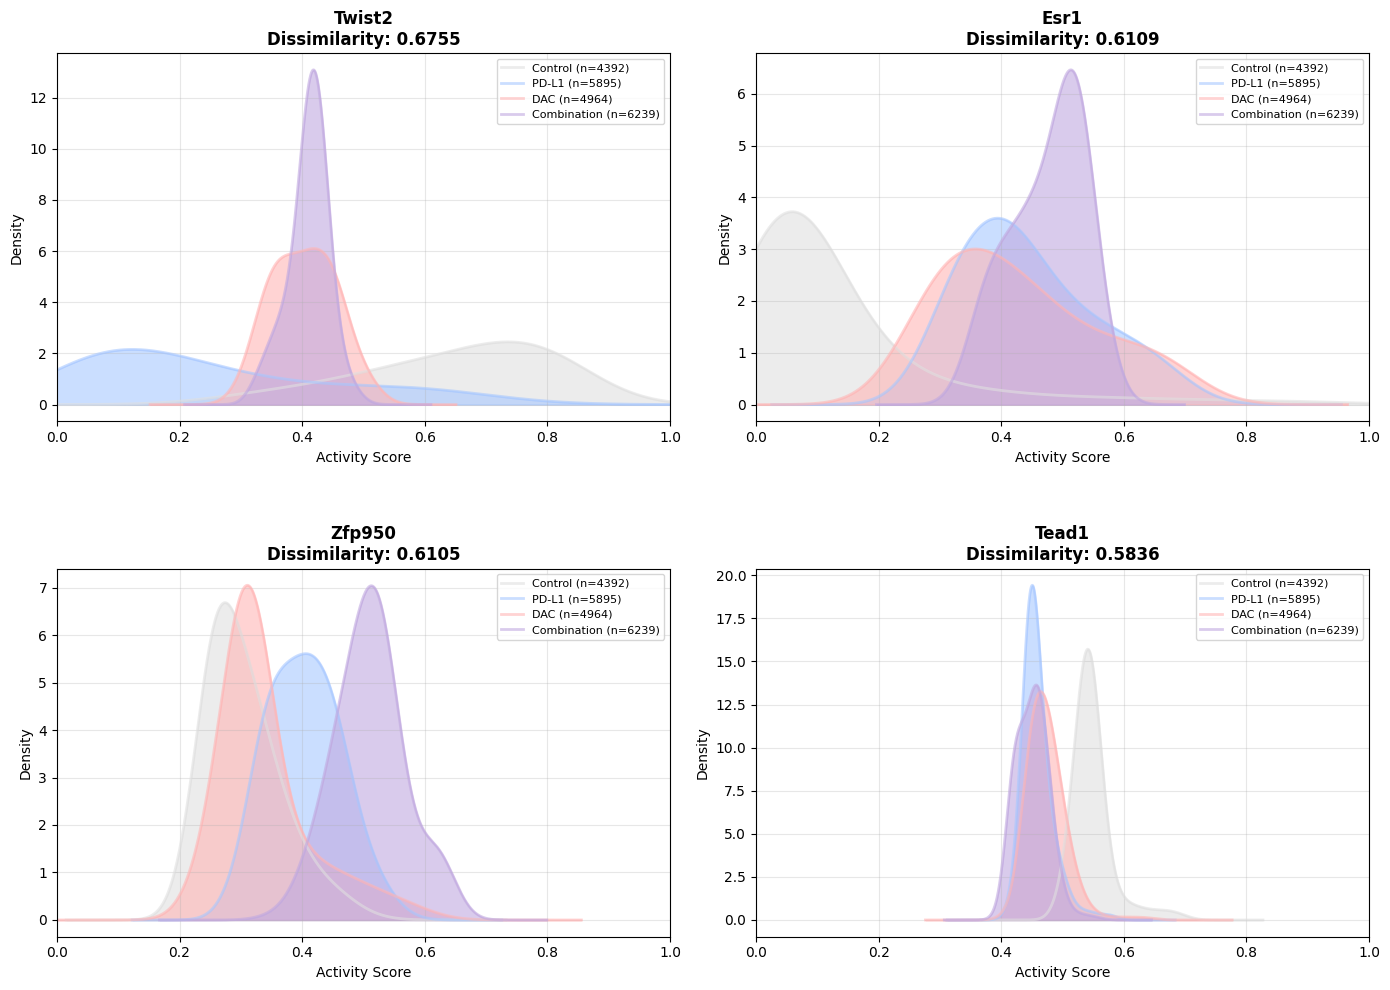

✓ Filled AUC distribution plots created


In [9]:
# Plot AUC distributions for top TFs with filled density
fig = viz.plot_auc_distributions(
    tf_names=top_tfs[0:4],
    labels=[0, 1, 2, 3],
    grid_layout = None,
    fill=True,
    alpha=0.6,
    bw_adjust=0.5,
    save=True,
    filename="AUC_distributions_filled.pdf"
)
print("✓ Filled AUC distribution plots created")

### AUC Distribution Variations

Explore different visualization styles for detailed analysis.


PLOTTING AUC DISTRIBUTIONS

Comparing labels [0, 1, 2, 3].
Plotting 2 TFs...
Multi-page mode: 2 rows x 1 cols per page (1 pages)
  [1/2] Processing Twist2...
  [2/2] Processing Esr1...


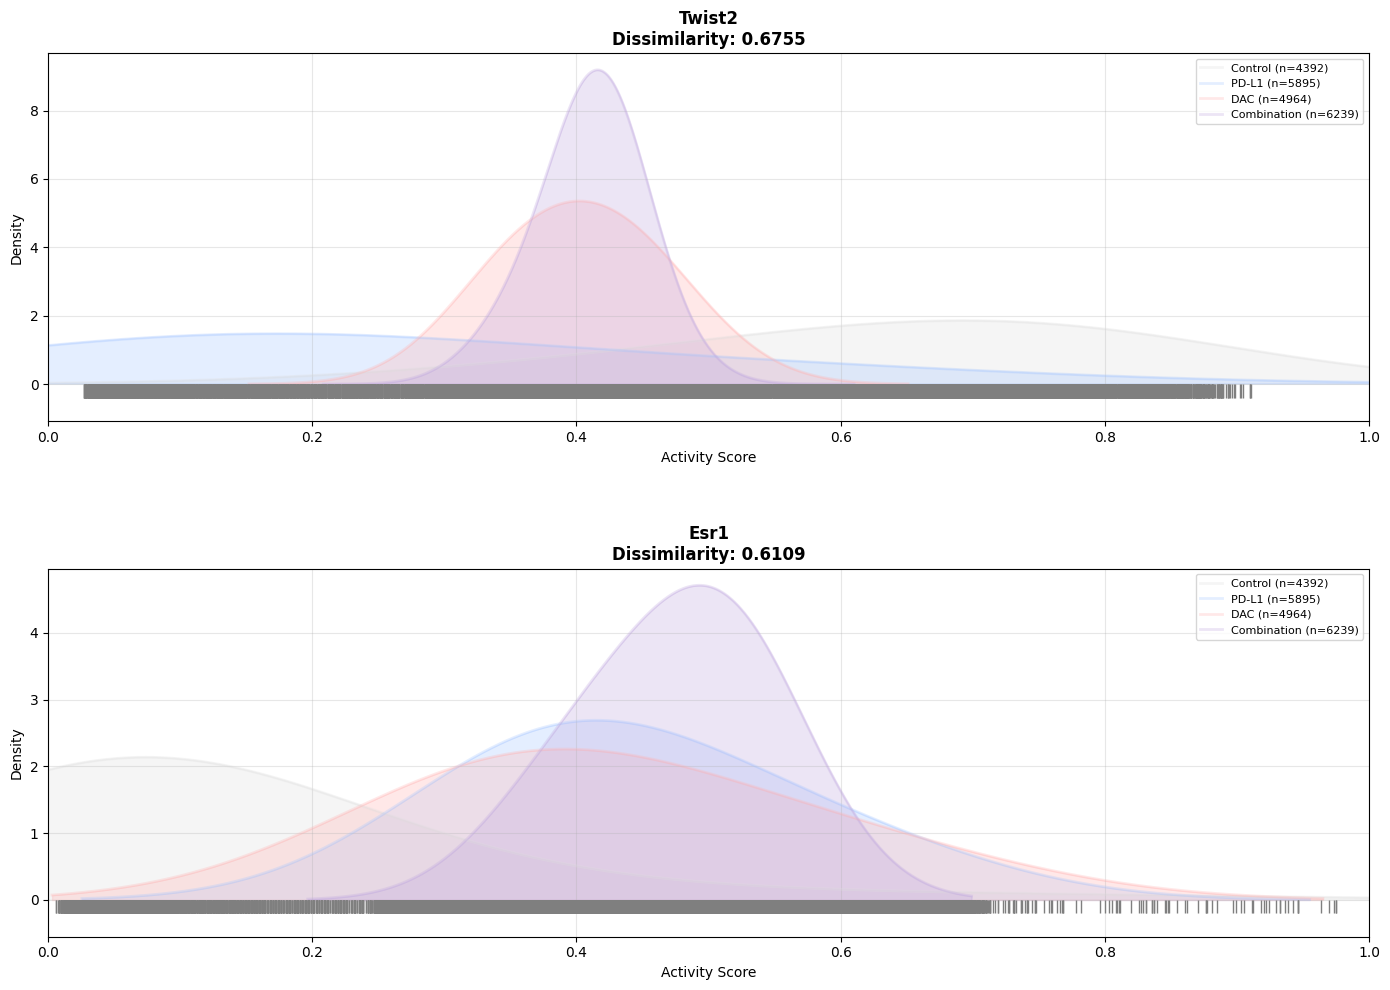


✓ Saved 2 TFs to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/AUC_distributions_smooth.pdf


In [10]:
# Smooth, lightly filled density curves
viz.plot_auc_distributions(
    tf_names=top_tfs[0:2],
    labels=[0, 1, 2, 3],
    grid_layout=(2,1),
    fill=True,
    rug=True, # Add rug plot at bottom
    alpha=0.3,  # Less intense color
    bw_adjust=1.0,  # Smoother curves
    save=True,
    filename="AUC_distributions_smooth.pdf"
)


PLOTTING AUC DISTRIBUTIONS

Comparing labels [0, 3].
Plotting 2 TFs...
Multi-page mode: 4 rows x 2 cols per page (1 pages)
  [1/2] Processing Twist2...
  [2/2] Processing Esr1...


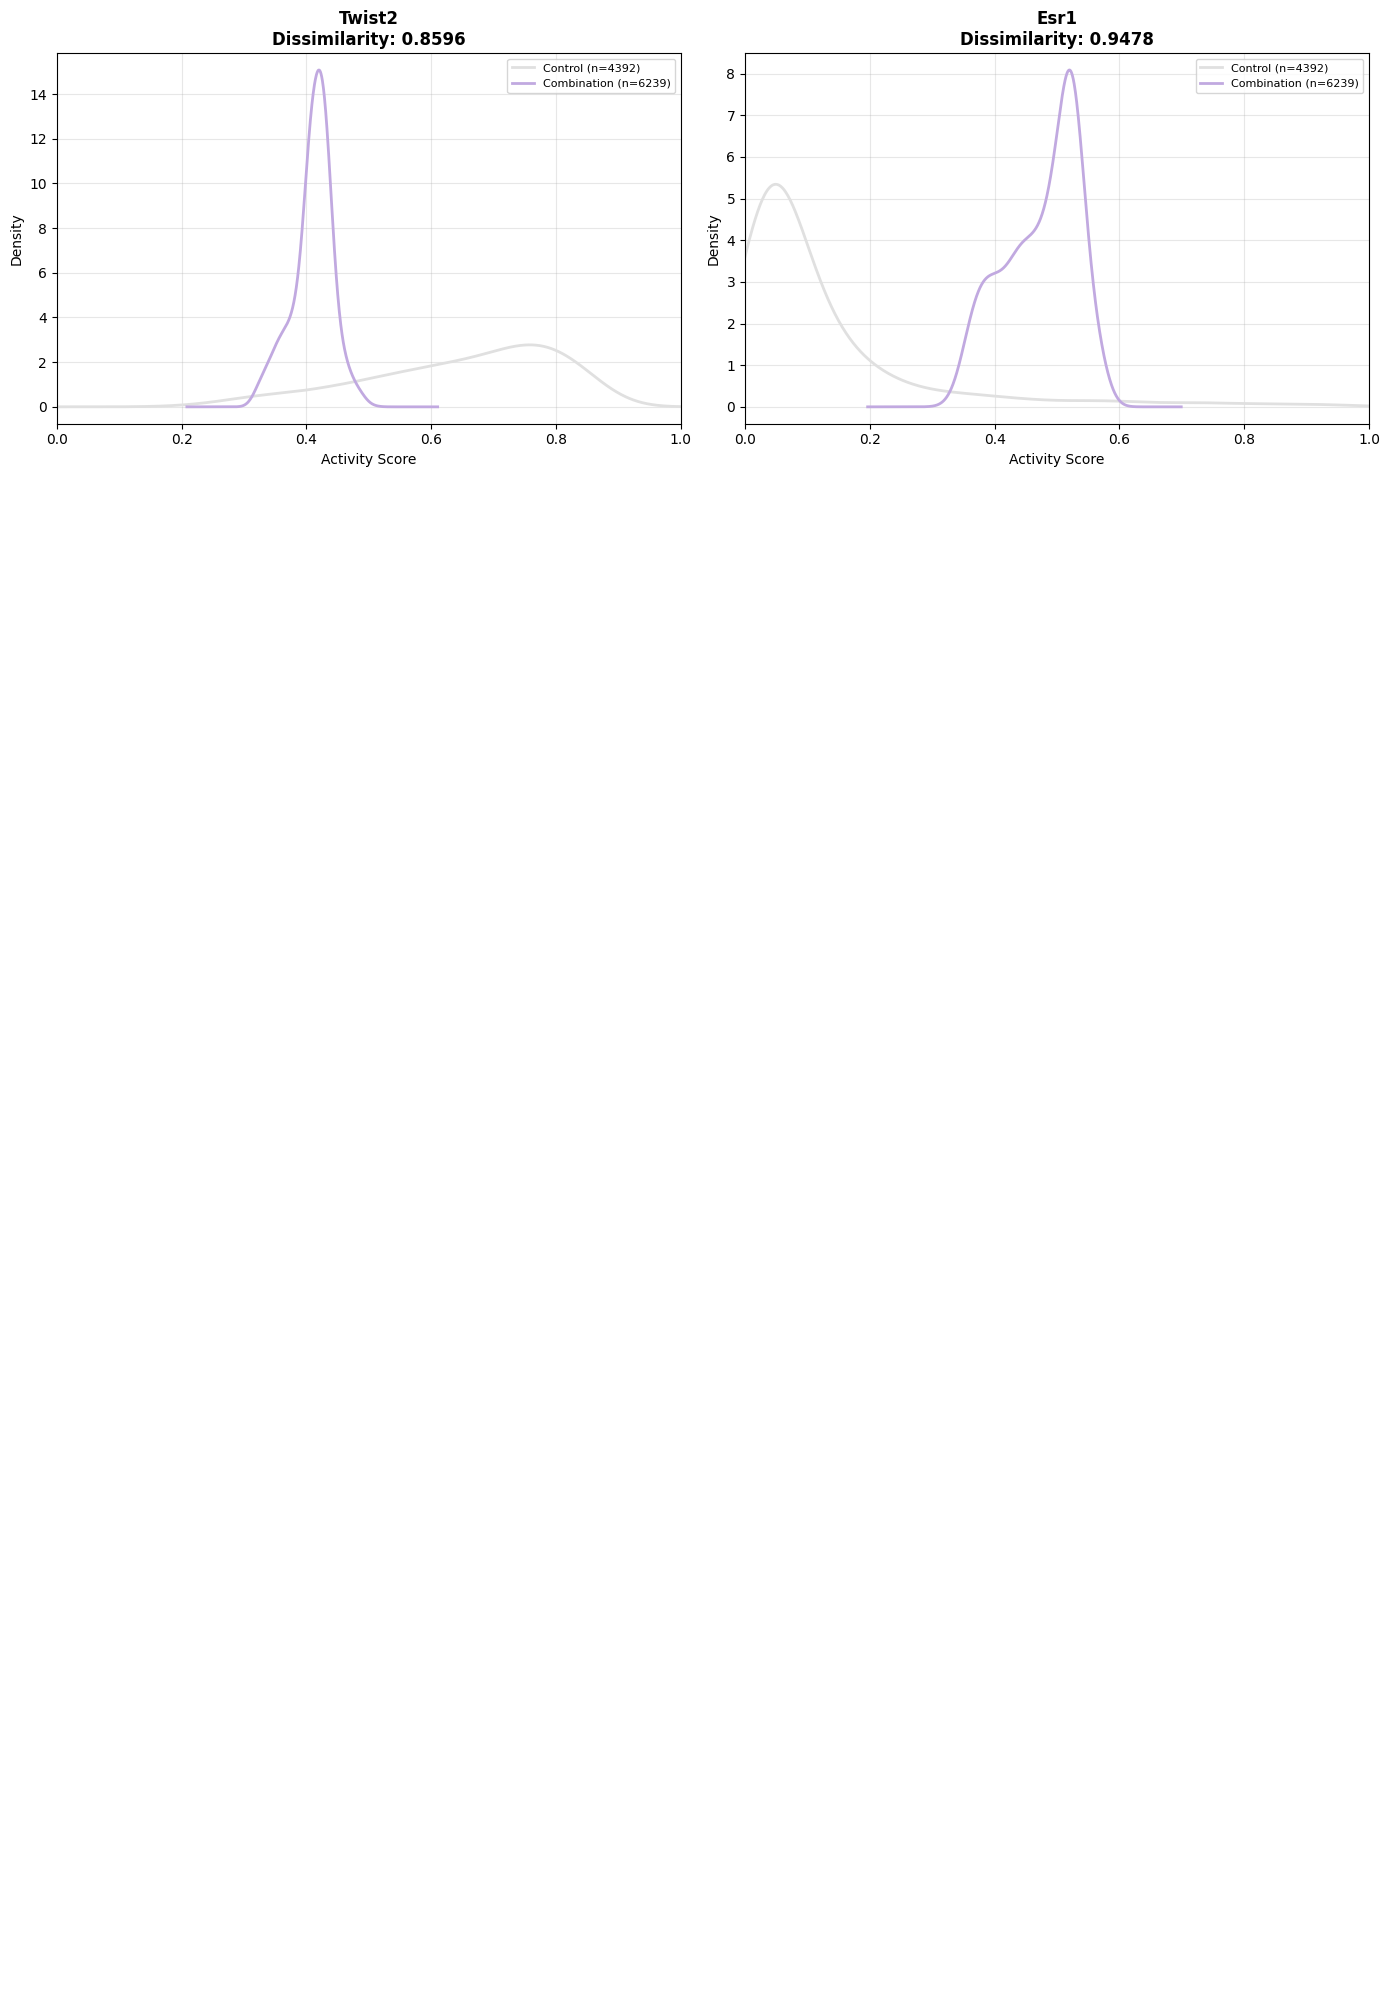


✓ Saved 2 TFs to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/AUC_distributions_detailed.pdf


In [11]:
# Unfilled line plots showing fine details
viz.plot_auc_distributions(
    tf_names=top_tfs[0:2],
    labels=[0, 3], # Only 2 labels
    fill=False,  # Line plot only
    bw_adjust=0.3,  # Less smooth - shows detail
    rug = False, # No rug plot
    save=True,
    filename="AUC_distributions_detailed.pdf"
)

### Cumulative Activity Scores distribution
Sorted by activity scores and calculates EDF AUC 


PLOTTING AUC CUMULATIVE DISTRIBUTIONS

Comparing labels [0, 1, 2, 3].
Plotting 4 TFs...
Multi-page mode: 2 rows x 2 cols per page (1 pages)
  [1/4] Processing Twist2...
  [2/4] Processing Esr1...
  [3/4] Processing Zfp950...
  [4/4] Processing Tead1...


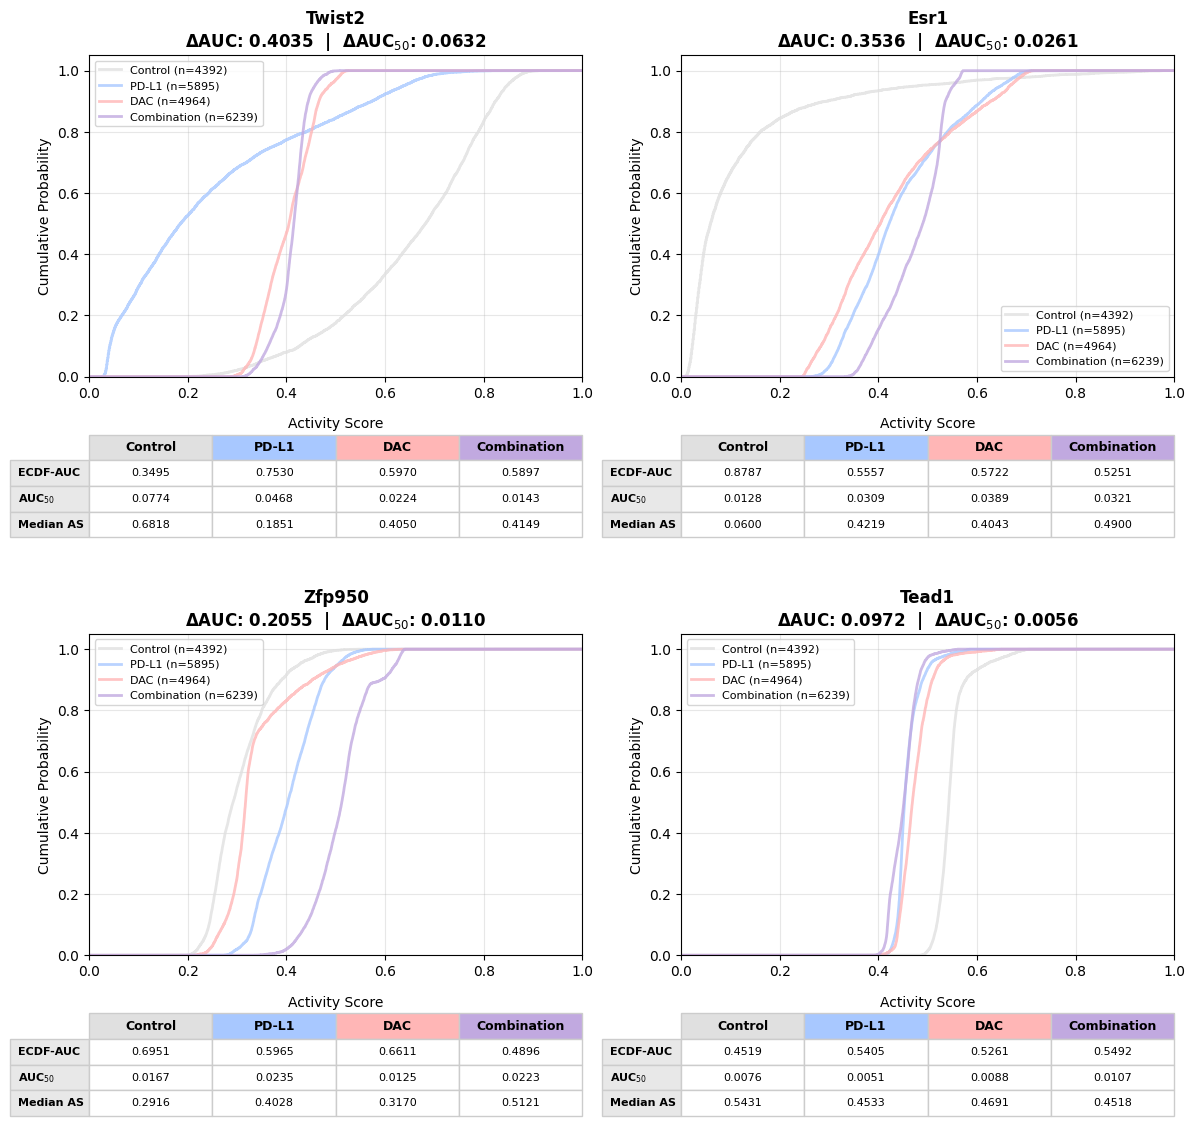


✓ Saved 4 TFs to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/AUC_cumulative.pdf


In [12]:
viz.plot_auc_cumulative(
    tf_names=top_tfs[0:4],
    grid_layout=(2,2),
    rug = False, # No rug plot
    save=True,
    filename="AUC_cumulative.pdf"
)

You can extract the AUC metrics with the following function.

In [ ]:
viz.calculate_ecdf_auc(top_tfs[0:4], percentile = 0.5)

TypeError: SimiCVisualization.calculate_ecdf_auc() got an unexpected keyword argument 'percentile'

## Step 4: Dissimilarity Heatmap

Visualize regulatory dissimilarity across all TFs.


PLOTTING DISSIMILARITY HEATMAP


CALCULATING DISSIMILARITY SCORES ACROSS LABELS

Comparing labels [0, 1, 2, 3].

Calculating dissimilarity scores...

Top 10 TFs by MinMax dissimilarity score:
  Twist2: 0.6755
  Esr1: 0.6109
  Zfp950: 0.6105
  Tead1: 0.5836
  Etv6: 0.5830
  Tcf7l2: 0.5761
  Trps1: 0.5739
  Runx1: 0.5715
  Nfat5: 0.5665
  Rfx3: 0.5578
✓ Saved to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/dissimilarity_heatmap.pdf
✓ Dissimilarity heatmap created


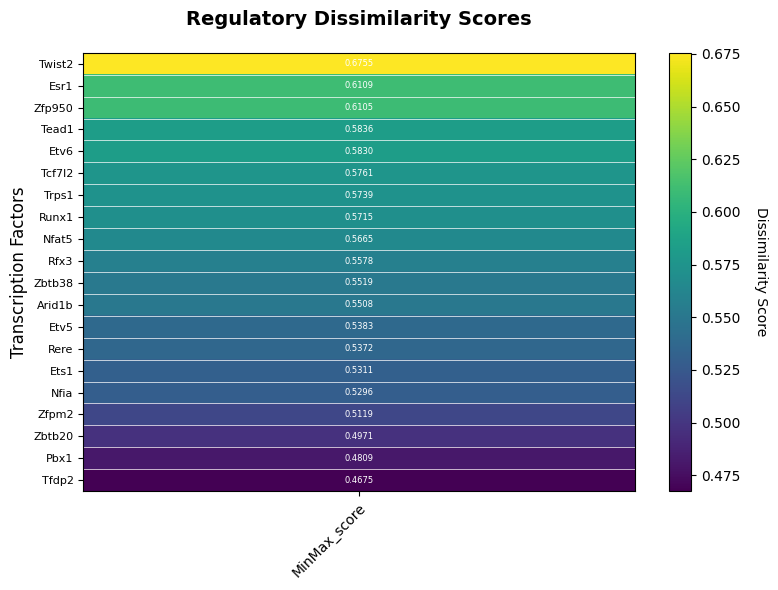

In [13]:
# Plot dissimilarity heatmap for top TFs
fig = viz.plot_dissimilarity_heatmap(
    labels=[0, 1, 2, 3],
    top_n_tfs=20,
    save=True,
    filename="dissimilarity_heatmap.pdf"
)
print("✓ Dissimilarity heatmap created")

## Step 5: Network-Specific Visualizations

### Extract and Visualize TF Networks


PLOTTING TF NETWORK HEATMAP

Processing Bnc2...
Retrieving network for TF: Bnc2
Total targets for Bnc2: 810

Top 10 targets by absolute weight:
                0         1         2         3
Gm29904  8.853750  3.594320  1.485412  2.276583
Cntn5    7.834270  2.315270  0.000000  0.000000
Dpysl3   7.367847  5.328248  2.090222  2.203399
Nebl     7.274832  0.000000  2.766655  0.000000
Bmper    7.259047  6.378626  2.487047  2.027628
Fendrr   7.063094  4.053312  0.000000  3.551875
Epha7    7.053283  5.008418  1.440811  0.000000
Scn5a    6.895907  4.641207  2.330382  3.873206
Lrrk2    6.782114  0.000000  2.357837  0.000000
Gpc4     6.713421  5.533182  3.163383  2.767372

✓ Saved to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/experiment_tumor_network_Bnc2_heatmap.pdf


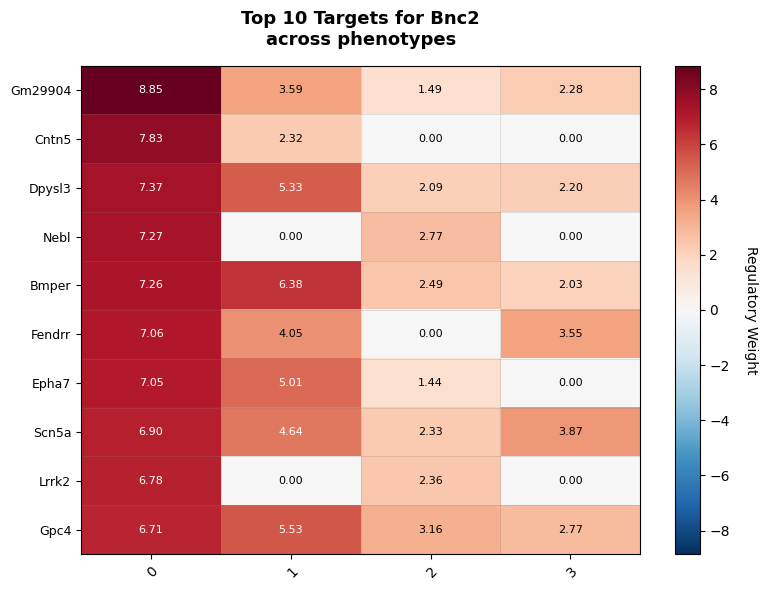

In [14]:
viz.plot_tf_network_heatmap("Bnc2", top_n_targets=10, save=True)

## Step 6: Summary Statistics Visualization

Create a comprehensive overview of AUC score distributions.


PLOTTING AUC SUMMARY STATISTICS

Label Control: 430416 AUC values
Label PD-L1: 589500 AUC values
Label DAC: 496400 AUC values
Label Combination: 623900 AUC values
✓ Saved to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/experiment_tumor_AUC_summary_statistics.pdf


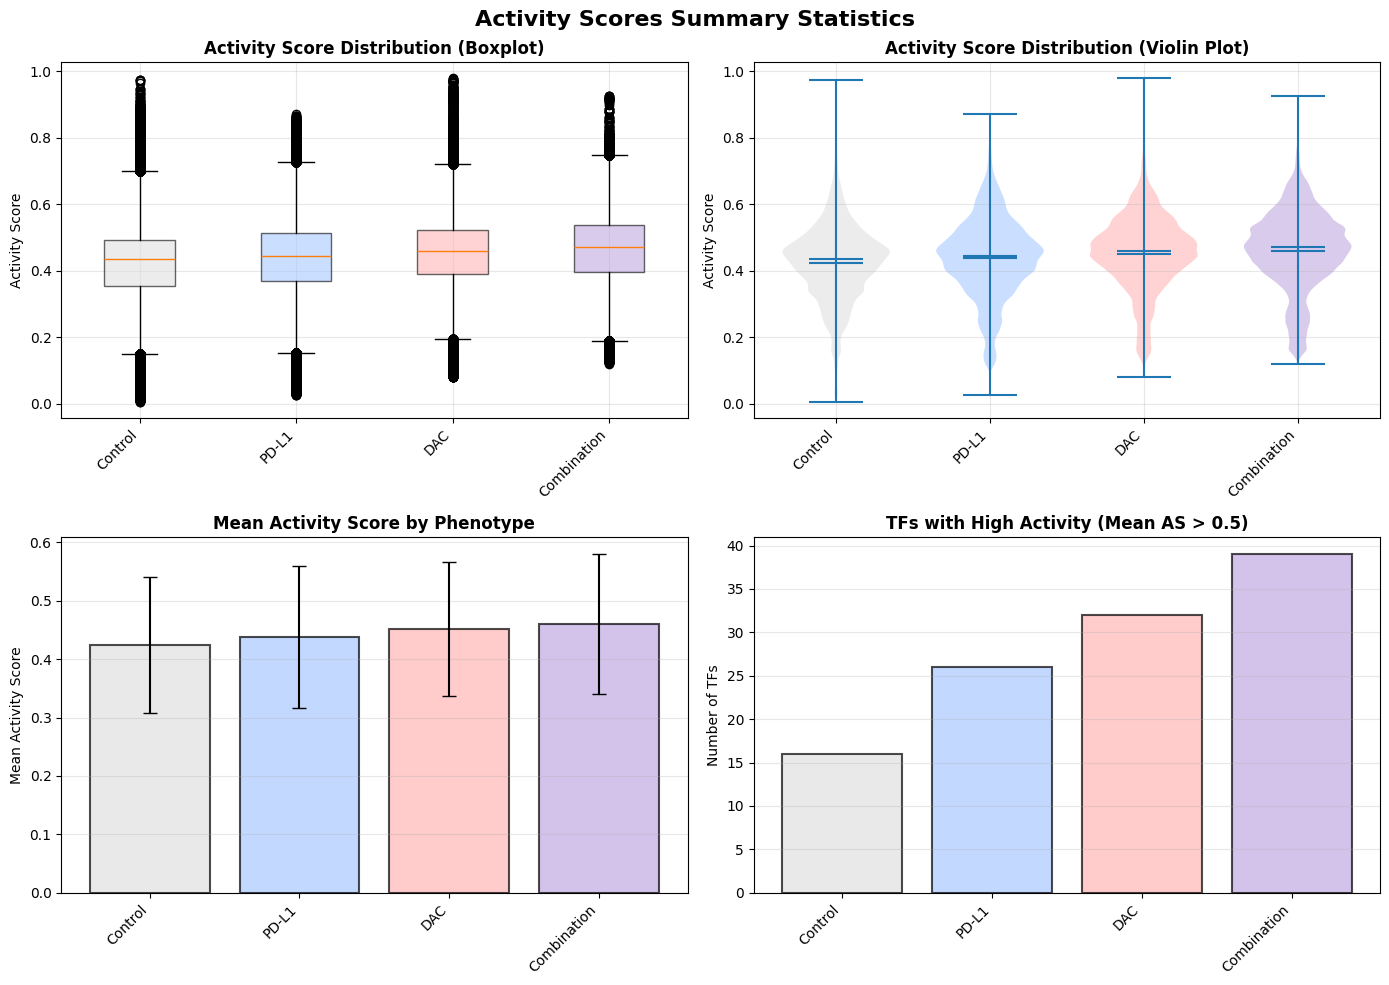

In [15]:
viz.plot_auc_summary_statistics(labels=[0, 1, 2, 3], save=True)


PLOTTING AUC STATISTICS TABLE

Label Control: 430416 AUC values
Label PD-L1: 589500 AUC values
Label DAC: 496400 AUC values
Label Combination: 623900 AUC values
✓ Saved to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/experiment_tumor_AUC_statistics_table.pdf


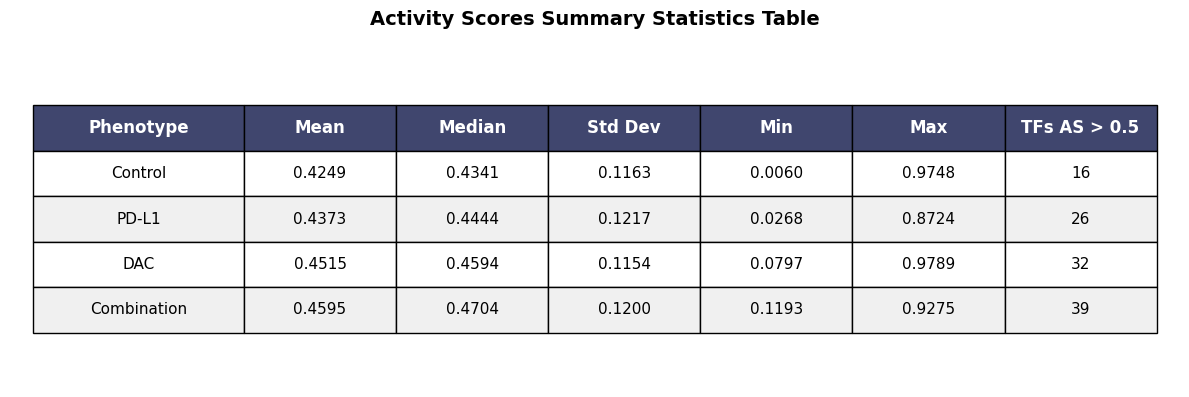

In [16]:
viz.plot_auc_statistics_table(save=True)

## Step 7: UMAP Integration (Optional)

If you have an AnnData object with UMAP coordinates, you can visualize single cell TF activity on the embeddings using the `viz.get_TF_auc()` to extract selected TF activity scores in a pd.DataFrame format (see example below).

Alternatively, if you are more confortable with Seurat/SingleCellExperiment (R world) you can easily incorporate these activity scores in the metadata.  

A complete matrix for all TFs was automatically saved in when you run `SimiCPipeline`. 
```
    matrices/
        └── experiment_tumor/
            └── experiment_tumor_L1_0.1_L2_0.01_wAUC_matrices_filtered_BIC_collected_collected.csv
```

In [18]:
import scanpy as sc
import pandas as pd
import simicpipeline
# Load your AnnData object
adata = simicpipeline.load_from_anndata('./data/DAC_aPDL1_seurat_annotated.h5ad')
adata_subset = adata.copy()
adata_subset = adata_subset[adata_subset.obs["final_annotation_functional"].isin(['Proliferating cells','Basal-like'])].copy()
adata_subset = adata_subset[adata_subset.obs["cellLine"] == "KPB25L"].copy()
print(adata_subset)

# Step 1. Extract auc scores for specific TFs
tf_names = ["Bnc2", "Runx2"]
activity_scores = viz.get_TF_auc(TF_name= tf_names, stacked=True)
col_names = [tf + "_AS" for tf in tf_names]
col_names.append("label")
activity_scores.columns = col_names
print(activity_scores.head())

# Step 2: Check if all indices in activity_scores are in adata.obs
missing_indices = activity_scores.index.difference(adata.obs.index)

if len(missing_indices) > 0:
    print(f"Warning: {len(missing_indices)} indices in activity_scores are NOT in adata.obs")
    print("Missing indices:", missing_indices.tolist())
else:
    print("✓ All indices in activity_scores are found in adata.obs")
    
# Step 3: Add activity scores to AnnData object metadata
# Ensure the indices of `activity_scores` match the `adata.obs` index
adata_subset.obs = adata_subset.obs.join(activity_scores)
adata_subset.obs

AnnData object with n_obs × n_vars = 21490 × 36774
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'species', 'gene_count', 'tscp_count', 'mread_count', 'bc1_wind', 'bc2_wind', 'bc3_wind', 'bc1_well', 'bc2_well', 'bc3_well', 'treatment', 'cellLine', 'percent.mt', 'percent.rb', 'percent.hb', 'integrated_snn_res.0.095', 'seurat_clusters', 'sctype_custom', 'sctype_functional', 'sctype_SCsubtype', 'final_annotation', 'final_annotation_functional'
    var: 'vf_vst_counts.1_mean', 'vf_vst_counts.1_variance', 'vf_vst_counts.1_variance.expected', 'vf_vst_counts.1_variance.standardized', 'vf_vst_counts.1_variable', 'vf_vst_counts.1_rank', 'vf_vst_counts.2_mean', 'vf_vst_counts.2_variance', 'vf_vst_counts.2_variance.expected', 'vf_vst_counts.2_variance.standardized', 'vf_vst_counts.2_variable', 'vf_vst_counts.2_rank', 'vf_vst_counts.3_mean', 'vf_vst_counts.3_variance', 'vf_vst_counts.3_variance.expected', 'vf_vst_counts.3_variance.standardized', 'vf_vst_counts.3_variable', 'vf_vst

,orig.ident,nCount_RNA,nFeature_RNA,sample,species,gene_count,tscp_count,mread_count,bc1_wind,bc2_wind,...,integrated_snn_res.0.095,seurat_clusters,sctype_custom,sctype_functional,sctype_SCsubtype,final_annotation,final_annotation_functional,Bnc2_AS,Runx2_AS,label
19_02_08__s1,snParseBS,3862.0,1768,KPB25L_Combination,GRCm39,1768,3862,5716,19,2,...,1,0,Cancer cells,Proliferating cells,Proliferating cells,Cancer cells,Proliferating cells,0.378044,0.422599,0
19_02_88__s1,snParseBS,17490.0,4358,KPB25L_Combination,GRCm39,4358,17490,26167,19,2,...,0,0,Unknown,Basal-like,Basal-like,Cancer cells,Basal-like,0.404421,0.564422,0
19_03_02__s1,snParseBS,11969.0,4256,KPB25L_Combination,GRCm39,4256,11969,17970,19,3,...,1,0,Cancer cells,Proliferating cells,Proliferating cells,Cancer cells,Proliferating cells,0.394181,0.417152,0
19_03_23__s1,snParseBS,12740.0,4344,KPB25L_Combination,GRCm39,4344,12740,19284,19,3,...,1,0,Cancer cells,Proliferating cells,Proliferating cells,Cancer cells,Proliferating cells,0.397918,0.387091,0
19_03_58__s1,snParseBS,9432.0,3769,KPB25L_Combination,GRCm39,3769,9432,13858,19,3,...,1,0,Cancer cells,Proliferating cells,Proliferating cells,Cancer cells,Proliferating cells,0.349341,0.470390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06_91_33__s8,snParseBS,13276.0,4469,KPB25L_control,GRCm39,4469,13276,19719,6,91,...,1,0,Cancer cells,Proliferating cells,Proliferating cells,Cancer cells,Proliferating cells,0.408001,0.483632,3
06_92_32__s8,snParseBS,1971.0,1418,KPB25L_control,GRCm39,1418,1971,3035,6,92,...,0,0,Unknown,Basal-like,Basal-like,Cancer cells,Basal-like,0.481384,0.359384,3
06_92_74__s8,snParseBS,10972.0,3699,KPB25L_control,GRCm39,3699,10972,16333,6,92,...,1,0,Cancer cells,Proliferating cells,Proliferating cells,Cancer cells,Proliferating cells,0.410624,0.452387,3
06_92_89__s8,snParseBS,6205.0,2592,KPB25L_control,GRCm39,2592,6205,9053,6,92,...,0,0,Unknown,Basal-like,Basal-like,Cancer cells,Basal-like,0.471470,0.586473,3


Run these steps from the `scanpy` [tutorial](https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html) or use your processed object.

In [19]:
# Normalizing to median total counts
sc.pp.normalize_total(adata_subset)
# Logarithmize the data
sc.pp.log1p(adata_subset)
sc.pp.highly_variable_genes(adata_subset, n_top_genes=2000, batch_key="sample")
sc.tl.pca(adata_subset)
sc.pp.neighbors(adata_subset, use_rep='X_pca', n_neighbors=15)
sc.tl.umap(adata_subset)

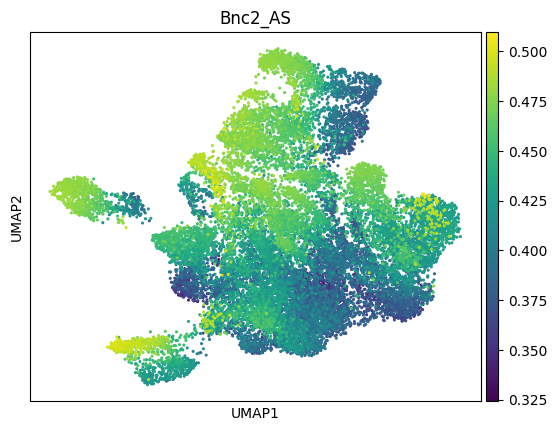

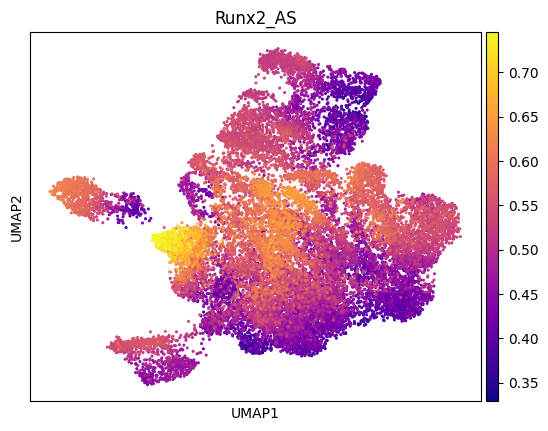

In [20]:
# Plot UMAP for Bnc2 activity scores
sc.pl.umap(adata_subset, color="Bnc2_AS", cmap="viridis", size=20)
# Plot UMAP for Runx2 activity scores
sc.pl.umap(adata_subset, color="Runx2_AS", cmap="plasma", size=20)

## Step 8: Export Results

You can easily save all the visualizations generated with the argument `save`= True and customize the name with `filename`. Furthermore, all plotting functions return a matplotlib.pyplot figure so you can manually save it.


## Additional functionalities

### Customize Label Names

You can access and change the labels and colors after initialization with the function `set_label_names()` 

In [21]:
# Set custom label names for better visualization
viz.set_label_names(
    p2assignment=viz.project_dir / "inputFiles/treatment_annotation.txt",
    label_names={0: 'Control', 1: 'PD-L1',2: 'DAC',3: 'Combination'},
    colors={0: '#e0e0e0', 1: '#a8c8ff', 2: '#ffb6b6', 3: '#c1a9e0'})

print(f"✓ Label names configured: {viz.label_names}")
print(f"✓ Colors configured: {viz.colors}")

Label names set: {0: 'Control', 1: 'PD-L1', 2: 'DAC', 3: 'Combination'}
Label colors set: {0: '#e0e0e0', 1: '#a8c8ff', 2: '#ffb6b6', 3: '#c1a9e0'}
✓ Label names configured: {0: 'Control', 1: 'PD-L1', 2: 'DAC', 3: 'Combination'}
✓ Colors configured: {0: '#e0e0e0', 1: '#a8c8ff', 2: '#ffb6b6', 3: '#c1a9e0'}


### Set Up File Paths

Point the visualization to your pipeline results files. This is useful if you have old SImiC runs and want to take advantage of the visualization funcitonality.

In [22]:
viz2 = SimiCVisualization(
    project_dir="./SimiCExampleRun/KPB25L/Tumor",
    run_name="experiment_tumor",
    search = False,
    lambda1=0.1,
    lambda2=0.01,
    p2assignment="./SimiCExampleRun/KPB25L/Tumor/inputFiles/treatment_annotation.txt",
    label_names={0: 'Control', 1: 'PD-L1',2: 'DAC',3: 'Combination'},
    colors={0: '#e0e0e0', 1: '#a8c8ff', 2: '#ffb6b6', 3: '#c1a9e0'}
)

out_dir = viz2.project_dir / "outputSimic/matrices/" / viz2.run_name

# If you're continuing from a previous run, set the paths
viz2.set_paths_custom(
    force = True,
    p2df=viz2.project_dir / "inputFiles/expression_matrix.pickle",
    p2assignment=viz2.project_dir / "inputFiles/treatment_annotation.txt",
    p2tf=viz2.project_dir / "inputFiles/TF_list.csv",
    p2simic_matrices= out_dir / "experiment_tumor_L1_0.1_L2_0.01_simic_matrices.pickle",
    p2filtered_matrices = out_dir / "experiment_tumor_L1_0.1_L2_0.01_simic_matrices_filtered_BIC.pickle",
    p2auc_raw= out_dir / "experiment_tumor_L1_0.1_L2_0.01_wAUC_matrices.pickle",
    p2auc_filtered= out_dir / "experiment_tumor_L1_0.1_L2_0.01_wAUC_matrices_filtered_BIC.pickle"
)

Label names set: {0: 'Control', 1: 'PD-L1', 2: 'DAC', 3: 'Combination'}
Label colors set: {0: '#e0e0e0', 1: '#a8c8ff', 2: '#ffb6b6', 3: '#c1a9e0'}

SETTING CUSTOM PATHS

✓ Custom paths successfully set.




In [23]:
viz2.available_results()


Available Results:
✓ Ws_raw
✓ Ws_filtered
✗ auc_raw
✓ auc_filtered



## Summary

This tutorial covered:

✓ Creating visualization objects from `SimiCPipeline` results

✓ Customizing label names for clarity and colors

✓ Weight distribution visualizations (R², TF weights, target weights)

✓ AUC score distributions with multiple visualization styles

✓ Dissimilarity analysis across phenotypes

✓ TF-specific network visualization

✓ Summary statistics and comprehensive overviews

✓ Optional UMAP visualization

#### Generate a printed summary of all created visualizations.

In [24]:
# List all generated figures
figure_files = sorted(viz.figures_path.glob('*.pdf'))

print("\n" + "="*70)
print("VISUALIZATION SUMMARY")
print("="*70)
print(f"\nGenerated {len(figure_files)} visualization files:")
print(f"\nSaved to: {viz.figures_path}\n")

for i, fig_file in enumerate(figure_files, 1):
    print(f"{i}. {fig_file.name}")

print("\n" + "="*70)


VISUALIZATION SUMMARY

Generated 12 visualization files:

Saved to: SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor

1. ALL_TARGET_weights_barplot_grid.pdf
2. ALL_TF_weights_barplot_grid.pdf
3. AUC_distributions_detailed.pdf
4. AUC_distributions_filled.pdf
5. AUC_distributions_smooth.pdf
6. R2_distribution.pdf
7. Top_TF_weights_barplot.pdf
8. dissimilarity_heatmap.pdf
9. experiment_tumor_AUC_statistics_table.pdf
10. experiment_tumor_AUC_summary_statistics.pdf
11. experiment_tumor_network_Bnc2_heatmap.pdf
12. selected_target_weights_barplot.pdf




## Next Steps

1. **Customize visualizations**: Modify colors, styles, and layouts to match your publication requirements
2. **Export figures**: Save high-resolution PDFs suitable for manuscript submission with different layouts
3. **Deep-dive analysis**: Use pipeline methods to extract data for custom visualizations
4. **Network analysis**: Combine results with network analysis tools for interactive exploration
5. **Biological validation**: Cross-reference predicted regulons with experimental data

## Additional Resources
- Data preprocessing: `Tutorial_SimiCPipeline_preprocessing.ipynb`
- Complete pipeline tutorial: `Tutorial_SimiCPipeline_full.ipynb`
- API documentation: Check the SimiCPipeline and SimiCVisualization class docstrings
- Original publication: [Peng et al., Commun Biol 5, 351 (2022)](https://www.nature.com/articles/s42003-022-03319-7)